In [31]:

library(sceasy)
library(reticulate)
library(Seurat)
library(SeuratDisk)
library(ggplot2)
library(patchwork)
library(tidyverse)
library(dplyr)
library(SeuratData)

In [32]:

rds_obj <- readRDS('../../../../common_data/single_cell_data/inhibitory_neurons//Inhibitory_neurons.rds')
rds_obj@meta.data <- rds_obj@meta.data %>%
  rownames_to_column(var = "cell_id")


In [33]:
rds_obj

An object of class Seurat 
33538 features across 329699 samples within 1 assay 
Active assay: RNA (33538 features, 0 variable features)
 2 layers present: counts, data
 1 dimensional reduction calculated: umap

In [34]:
View(rds_obj)

An object of class Seurat 
33538 features across 329699 samples within 1 assay 
Active assay: RNA (33538 features, 0 variable features)
 2 layers present: counts, data
 1 dimensional reduction calculated: umap

In [35]:
str(rds_obj)

Formal class 'Seurat' [package "SeuratObject"] with 13 slots
  ..@ assays      :List of 1
  .. ..$ RNA:Formal class 'Assay' [package "Seurat"] with 8 slots
  .. .. .. ..@ counts       :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. .. .. .. ..@ i       : int [1:1103903106] 39 54 86 92 93 98 142 153 168 186 ...
  .. .. .. .. .. ..@ p       : int [1:329700] 0 2013 5193 8872 11274 12161 17177 18984 20028 27167 ...
  .. .. .. .. .. ..@ Dim     : int [1:2] 33538 329699
  .. .. .. .. .. ..@ Dimnames:List of 2
  .. .. .. .. .. .. ..$ : chr [1:33538] "MIR1302-2HG" "FAM138A" "OR4F5" "AL627309.1" ...
  .. .. .. .. .. .. ..$ : chr [1:329699] "AACTGGTAGCTAGGCA-1-0" "AACTTTCTCCCATTAT-1-0" "AAGACCTTCCACGTGG-1-0" "AAGGTTCGTACCGAGA-1-0" ...
  .. .. .. .. .. ..@ x       : num [1:1103903106] 1 1 1 1 1 1 3 1 1 1 ...
  .. .. .. .. .. ..@ factors : list()
  .. .. .. ..@ data         :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. .. .. .. ..@ i       : int [1:1103903106]

In [36]:
head(attributes(rds_obj)$meta.data, 5)

,cell_id,cell_type_high_resolution,subject
,<chr>,<fct>,<chr>
1,AACTGGTAGCTAGGCA-1-0,Inh PVALB CA8 (Chandelier),ROSMAP-52226
2,AACTTTCTCCCATTAT-1-0,Inh CUX2 MSR1,ROSMAP-52226
3,AAGACCTTCCACGTGG-1-0,Inh RYR3 TSHZ2,ROSMAP-52226
4,AAGGTTCGTACCGAGA-1-0,Inh L3-5 SST MAFB,ROSMAP-52226
5,ACCGTAATCGTCGTTC-1-0,Inh CUX2 MSR1,ROSMAP-52226


In [37]:

head(attributes(rds_obj)$meta.data$cell_type_high_resolution, 55)

[1] Inh PVALB CA8 (Chandelier) Inh CUX2 MSR1             
 [3] Inh RYR3 TSHZ2             Inh L3-5 SST MAFB         
 [5] Inh CUX2 MSR1              Inh PVALB HTR4            
 [7] Inh ENOX2 SPHKAP           Inh LAMP5 RELN            
 [9] Inh PVALB HTR4             Inh RYR3 TSHZ2            
[11] Inh RYR3 TSHZ2             Inh RYR3 TSHZ2            
[13] Inh CUX2 MSR1              Inh VIP CLSTN2            
[15] Inh PVALB CA8 (Chandelier) Inh CUX2 MSR1             
[17] Inh L3-5 SST MAFB          Inh ENOX2 SPHKAP          
[19] Inh GPC5 RIT2              Inh CUX2 MSR1             
[21] Inh CUX2 MSR1              Inh VIP ABI3BP            
[23] Inh VIP CLSTN2             Inh L1 PAX6 CA4           
[25] Inh PVALB SULF1            Inh L3-5 SST MAFB         
[27] Inh L3-5 SST MAFB          Inh VIP ABI3BP            
[29] Inh ALCAM TRPM3            Inh PVALB HTR4            
[31] Inh PVALB SULF1            Inh PVALB HTR4            
[33] Inh ENOX2 SPHKAP           Inh PVALB HTR4            
[35] Inh L3-5 SST MAFB          Inh PVALB CA8 (Chandelier)
[37] Inh PVALB CA8 (Chandelier) Inh L5-6 SST TH           
[39] Inh PTPRK FAM19A1          Inh LAMP5 NRG1 (Rosehip)  
[41] Inh VIP CLSTN2             Inh LAMP5 RELN            
[43] Inh L1-6 LAMP5 CA13        Inh VIP ABI3BP            
[45] Inh VIP ABI3BP             Inh CUX2 MSR1             
[47] Inh CUX2 MSR1              Inh VIP CLSTN2            
[49] Inh ALCAM TRPM3            Inh L6 SST NPY            
[51] Inh L3-5 SST MAFB          Inh PVALB HTR4            
[53] Inh VIP CLSTN2             Inh PVALB HTR4            
[55] Inh PVALB HTR4            
25 Levels: Inh ALCAM TRPM3 Inh CUX2 MSR1 Inh ENOX2 SPHKAP ... Inh VIP TSHZ2

In [38]:
table(rds_obj@meta.data$cell_type_high_resolution)


           Inh ALCAM TRPM3              Inh CUX2 MSR1 
                     10897                      24885 
          Inh ENOX2 SPHKAP          Inh FBN2 EPB41L4A 
                     12396                       6769 
             Inh GPC5 RIT2            Inh L1 PAX6 CA4 
                      4788                       5070 
        Inh L1-2 PAX6 SCGN        Inh L1-6 LAMP5 CA13 
                      1617                      15060 
         Inh L3-5 SST MAFB       Inh L5-6 PVALB STON2 
                     23294                       5286 
           Inh L5-6 SST TH             Inh L6 SST NPY 
                      4502                       1404 
  Inh LAMP5 NRG1 (Rosehip)             Inh LAMP5 RELN 
                     26065                       8813 
         Inh PTPRK FAM19A1 Inh PVALB CA8 (Chandelier) 
                     10438                      14644 
            Inh PVALB HTR4            Inh PVALB SULF1 
                     42032                      21231 
         

In [39]:
individual_metadata <- read.delim("../../../../common_data/single_cell_data/individual_metadata_deidentified.tsv", stringsAsFactors = FALSE)
head(individual_metadata,5)

,subject,msex,age_death,pmi,race,Pathologic_diagnosis_of_AD
,<chr>,<int>,<chr>,<int>,<int>,<chr>
1,ROSMAP-10132,0,90+,7,1,yes
2,ROSMAP-10643,0,90+,13,1,yes
3,ROSMAP-10859,1,"(80,85]",14,2,yes
4,ROSMAP-12078,1,"(85,90]",3,1,yes
5,ROSMAP-12256,1,"(85,90]",4,1,yes


In [40]:
# Load necessary libraries

library(dplyr)

# Load your RDS object


# Read the TSV file

# Ensure the subject columns are character type (if they are not already)
rds_obj@meta.data$subject <- as.character(rds_obj@meta.data$subject)
individual_metadata$subject <- as.character(individual_metadata$subject)

# Merge the diagnosis information into the meta.data slot of the RDS object
rds_obj@meta.data <- rds_obj@meta.data %>%
  left_join(individual_metadata %>% select(subject, Pathologic_diagnosis_of_AD), by = "subject")

# Check if the merge was successful
head(rds_obj@meta.data)


,cell_id,cell_type_high_resolution,subject,Pathologic_diagnosis_of_AD
,<chr>,<fct>,<chr>,<chr>
1,AACTGGTAGCTAGGCA-1-0,Inh PVALB CA8 (Chandelier),ROSMAP-52226,no
2,AACTTTCTCCCATTAT-1-0,Inh CUX2 MSR1,ROSMAP-52226,no
3,AAGACCTTCCACGTGG-1-0,Inh RYR3 TSHZ2,ROSMAP-52226,no
4,AAGGTTCGTACCGAGA-1-0,Inh L3-5 SST MAFB,ROSMAP-52226,no
5,ACCGTAATCGTCGTTC-1-0,Inh CUX2 MSR1,ROSMAP-52226,no
6,ACGAGGAAGTGAACAT-1-0,Inh PVALB HTR4,ROSMAP-52226,no


In [41]:
table(rds_obj$Pathologic_diagnosis_of_AD)


    no    yes 
154477 175222 

In [42]:
count_matrix <- GetAssayData(rds_obj, slot = "counts")

In [43]:
print(head(count_matrix, 5))

5 x 329699 sparse Matrix of class "dgCMatrix"


  [[ suppressing 34 column names ‘AACTGGTAGCTAGGCA-1-0’, ‘AACTTTCTCCCATTAT-1-0’, ‘AAGACCTTCCACGTGG-1-0’ ... ]]



                                                                               
MIR1302-2HG . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
FAM138A     . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
OR4F5       . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
AL627309.1  . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
AL627309.3  . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
                  
MIR1302-2HG ......
FAM138A     ......
OR4F5       ......
AL627309.1  ......
AL627309.3  ......

 .....suppressing 329665 columns in show(); maybe adjust options(max.print=, width=)
 ..............................


In [44]:
inhibitory_seurat_obj <- CreateSeuratObject(counts = count_matrix, project = "ROSMAP", min.cells = 0, min.features = 0)

In [45]:
head(inhibitory_seurat_obj@meta.data,5)

,orig.ident,nCount_RNA,nFeature_RNA
,<fct>,<dbl>,<int>
AACTGGTAGCTAGGCA-1-0,ROSMAP,3560,2013
AACTTTCTCCCATTAT-1-0,ROSMAP,7015,3180
AAGACCTTCCACGTGG-1-0,ROSMAP,8166,3679
AAGGTTCGTACCGAGA-1-0,ROSMAP,4471,2402
ACCGTAATCGTCGTTC-1-0,ROSMAP,1249,887


In [46]:
View(inhibitory_seurat_obj)

An object of class Seurat 
33538 features across 329699 samples within 1 assay 
Active assay: RNA (33538 features, 0 variable features)
 1 layer present: counts

In [47]:
head(GetAssayData(inhibitory_seurat_obj, slot = "counts"),5)

  [[ suppressing 34 column names ‘AACTGGTAGCTAGGCA-1-0’, ‘AACTTTCTCCCATTAT-1-0’, ‘AAGACCTTCCACGTGG-1-0’ ... ]]



5 x 329699 sparse Matrix of class "dgCMatrix"
                                                                               
MIR1302-2HG . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
FAM138A     . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
OR4F5       . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
AL627309.1  . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
AL627309.3  . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
                  
MIR1302-2HG ......
FAM138A     ......
OR4F5       ......
AL627309.1  ......
AL627309.3  ......

 .....suppressing 329665 columns in show(); maybe adjust options(max.print=, width=)
 ..............................

In [ ]:
inhibitory_seurat_obj[["percent.mt"]] <- PercentageFeatureSet(inhibitory_seurat_obj, pattern = "^MT-")
head(inhibitory_seurat_obj@meta.data,10)

In [ ]:
inhibitory_seurat_obj[["percent.rb"]] <- PercentageFeatureSet(inhibitory_seurat_obj, pattern = "^RP[SL]")
head(inhibitory_seurat_obj@meta.data,10)

In [ ]:
vln_plot <- VlnPlot(inhibitory_seurat_obj, features = c("nFeature_RNA", "nCount_RNA", "percent.mt", "percent.rb"), ncol = 3)
vln_plot + theme(
  plot.title = element_text(size = 20),  # Adjust title size
  axis.title = element_text(size = 16),  # Adjust axis title size
  axis.text = element_text(size = 12)    # Adjust axis text size
)

In [ ]:
max(inhibitory_seurat_obj@meta.data$percent.mt, na.rm = TRUE)

In [ ]:
max(inhibitory_seurat_obj@meta.data$percent.rb, na.rm = TRUE)

In [ ]:
FeatureScatter(inhibitory_seurat_obj, feature1 = "nCount_RNA", feature2 = "nFeature_RNA") +
  geom_smooth(method = 'lm')

In [ ]:
inhibitory_seurat_obj@meta.data <- inhibitory_seurat_obj@meta.data %>%
  rownames_to_column(var = "cell_id")
inhibitory_seurat_obj@meta.data


In [ ]:

inhibitory_seurat_obj$log10GenesPerUMI <- log10(inhibitory_seurat_obj$nFeature_RNA) / log10(inhibitory_seurat_obj$nCount_RNA)
metadata <- inhibitory_seurat_obj@meta.data
metadata

In [ ]:
rds_obj@meta.data

In [ ]:
result <- merge(metadata, rds_obj@meta.data, by = "cell_id")
result


In [ ]:
inhibitory_seurat_obj@meta.data <- result

In [ ]:
head(inhibitory_seurat_obj@meta.data,20)

In [ ]:
metadata <- inhibitory_seurat_obj@meta.data
write.csv(metadata, file = "../../preprocessed_data/inhibitory_neuron/full_metadata_inhibitory_neurons.csv", row.names = TRUE)
# Save the metadata to a CSV file
write.csv(metadata, file = "../../preprocessed_data/inhibitory_neuron/metadata_inhibitory_neurons.csv", row.names = TRUE)

# Confirm the file is saved
print("Metadata saved to metadata.csv")


In [31]:
table(inhibitory_seurat_obj@meta.data$Pathologic_diagnosis_of_AD)


    no    yes 
154477 175222 

In [32]:
table(inhibitory_seurat_obj@meta.data$cell_type_high_resolution)


           Inh ALCAM TRPM3              Inh CUX2 MSR1 
                     10897                      24885 
          Inh ENOX2 SPHKAP          Inh FBN2 EPB41L4A 
                     12396                       6769 
             Inh GPC5 RIT2            Inh L1 PAX6 CA4 
                      4788                       5070 
        Inh L1-2 PAX6 SCGN        Inh L1-6 LAMP5 CA13 
                      1617                      15060 
         Inh L3-5 SST MAFB       Inh L5-6 PVALB STON2 
                     23294                       5286 
           Inh L5-6 SST TH             Inh L6 SST NPY 
                      4502                       1404 
  Inh LAMP5 NRG1 (Rosehip)             Inh LAMP5 RELN 
                     26065                       8813 
         Inh PTPRK FAM19A1 Inh PVALB CA8 (Chandelier) 
                     10438                      14644 
            Inh PVALB HTR4            Inh PVALB SULF1 
                     42032                      21231 
         

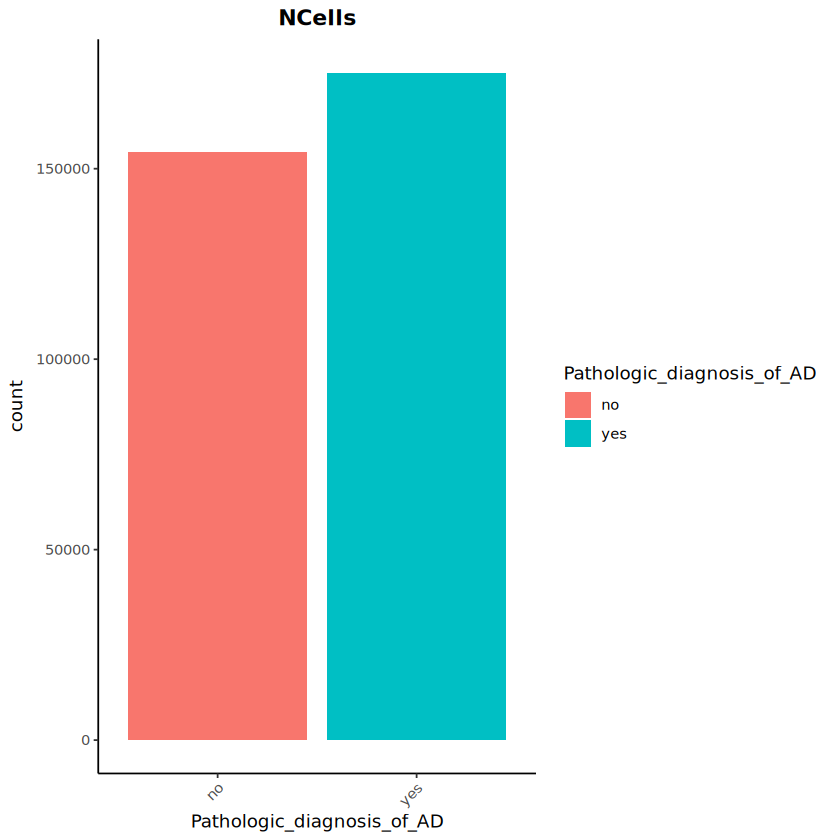

In [33]:
metadata <- inhibitory_seurat_obj@meta.data

metadata %>% 
  	ggplot(aes(x=Pathologic_diagnosis_of_AD, fill=Pathologic_diagnosis_of_AD)) + 
  	geom_bar() +
  	theme_classic() +
  	theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1)) +
  	theme(plot.title = element_text(hjust=0.5, face="bold")) +
  	ggtitle("NCells")

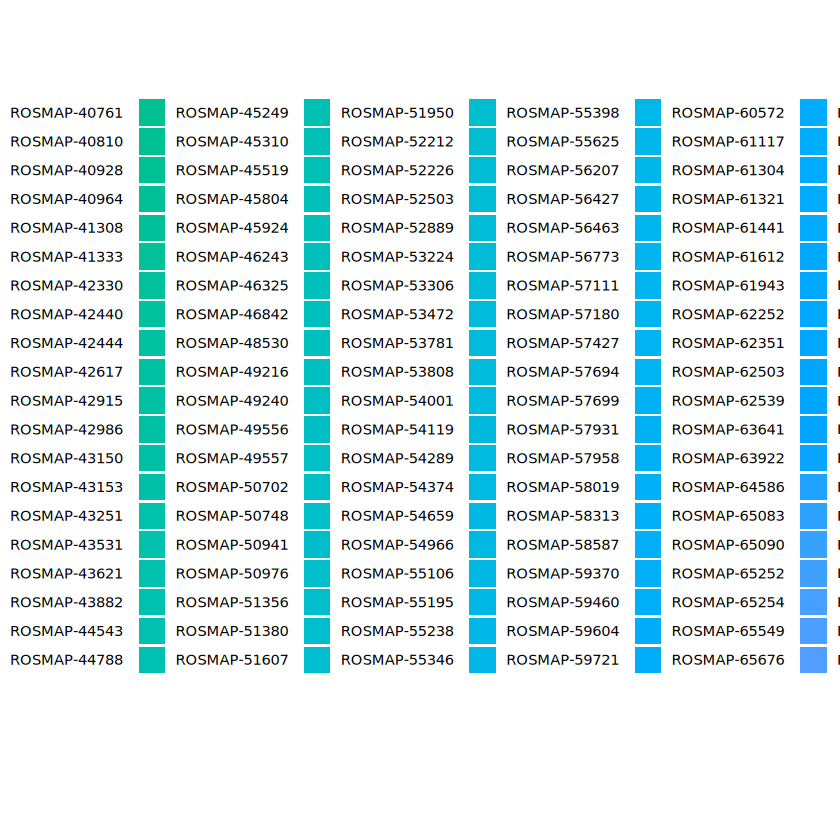

In [34]:
metadata <- inhibitory_seurat_obj@meta.data

metadata %>% 
  	ggplot(aes(x=subject, fill=subject)) + 
  	geom_bar() +
  	theme_classic() +
  	theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1)) +
  	theme(plot.title = element_text(hjust=0.5, face="bold")) +
  	ggtitle("NCells")

In [35]:
head(metadata,10)

,cell_id,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,percent.rb,log10GenesPerUMI,cell_type_high_resolution,subject,Pathologic_diagnosis_of_AD
,<chr>,<fct>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<fct>,<chr>,<chr>
1,AAACCCAAGAAATCCA-12-9,ROSMAP,13490,4276,0.2372128,0.2891030,0.8791833,Inh L3-5 SST MAFB,ROSMAP-65967,yes
2,AAACCCAAGAACGCGT-6-6,ROSMAP,2651,1533,8.1855903,0.4526594,0.9305174,Inh L3-5 SST MAFB,ROSMAP-90639,yes
3,AAACCCAAGAACTGAT-10-12,ROSMAP,6550,2764,4.8091603,0.2748092,0.9018135,Inh LAMP5 RELN,ROSMAP-57958,yes
4,AAACCCAAGAAGCGGG-31-8,ROSMAP,11658,4377,5.7385486,0.3945788,0.8953807,Inh VIP CLSTN2,ROSMAP-40761,yes
5,AAACCCAAGAATCCCT-14-8,ROSMAP,15297,4688,0.9217494,0.3072498,0.8772600,Inh VIP CLSTN2,ROSMAP-68841,yes
6,AAACCCAAGACCATTC-12-2,ROSMAP,14537,5093,0.8048428,0.5847149,0.8905696,Inh LAMP5 NRG1 (Rosehip),ROSMAP-73538,yes
7,AAACCCAAGACCATTC-28-10,ROSMAP,8550,3353,0.8421053,0.3391813,0.8966083,Inh LAMP5 NRG1 (Rosehip),ROSMAP-17378,no
8,AAACCCAAGACCGTTT-14-11,ROSMAP,7562,2849,0.7802169,0.3041523,0.8906976,Inh PVALB CA8 (Chandelier),ROSMAP-83352,yes
9,AAACCCAAGACGAAGA-9-4,ROSMAP,2304,1355,5.7291667,0.4774306,0.9314366,Inh CUX2 MSR1,ROSMAP-58587,yes


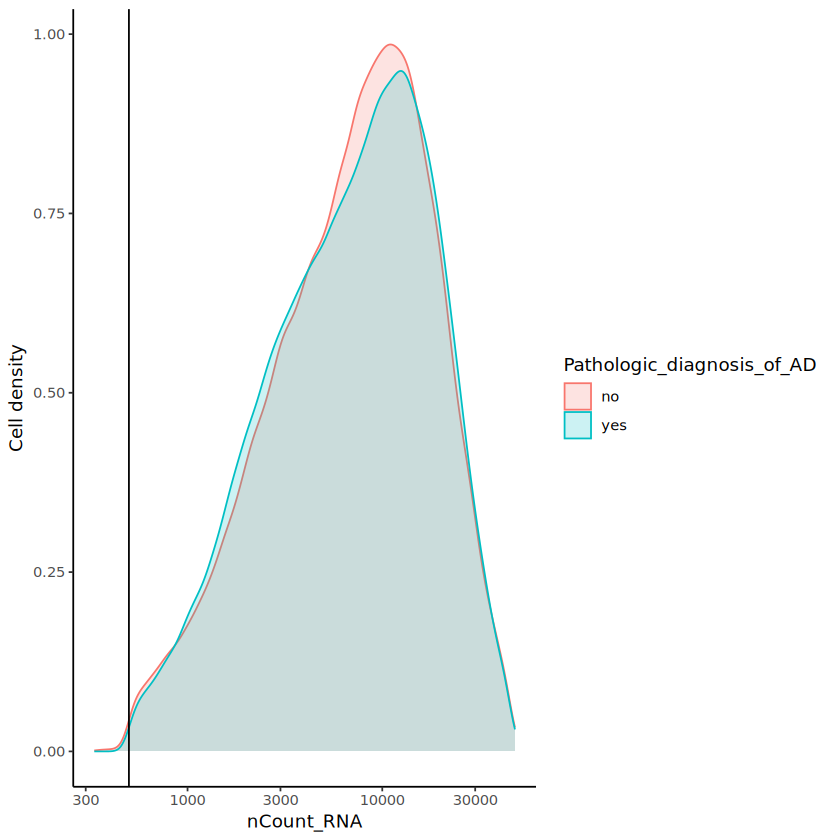

In [36]:
# Visualize the number UMIs/transcripts per cell
metadata %>% 
  	ggplot(aes(color=Pathologic_diagnosis_of_AD, x=nCount_RNA, fill= Pathologic_diagnosis_of_AD)) + 
  	geom_density(alpha = 0.2) + 
  	scale_x_log10() + 
  	theme_classic() +
  	ylab("Cell density") +
  	geom_vline(xintercept = 500)

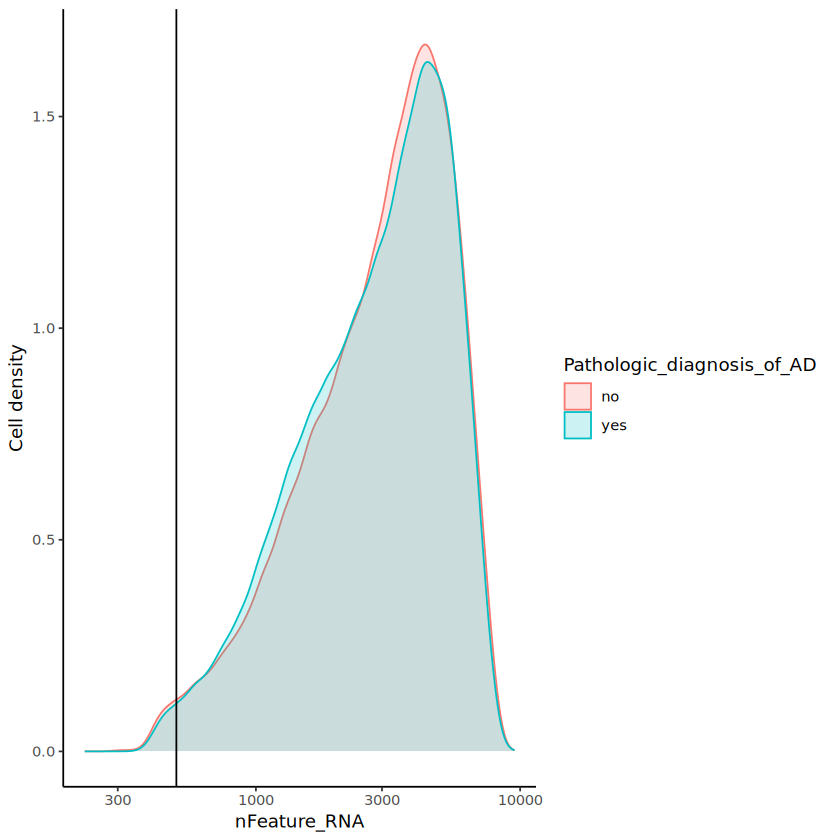

In [37]:
# Visualize the number UMIs/transcripts per cell
metadata %>% 
  	ggplot(aes(color=Pathologic_diagnosis_of_AD, x=nFeature_RNA, fill= Pathologic_diagnosis_of_AD)) + 
  	geom_density(alpha = 0.2) + 
  	scale_x_log10() + 
  	theme_classic() +
  	ylab("Cell density") +
  	geom_vline(xintercept = 500)

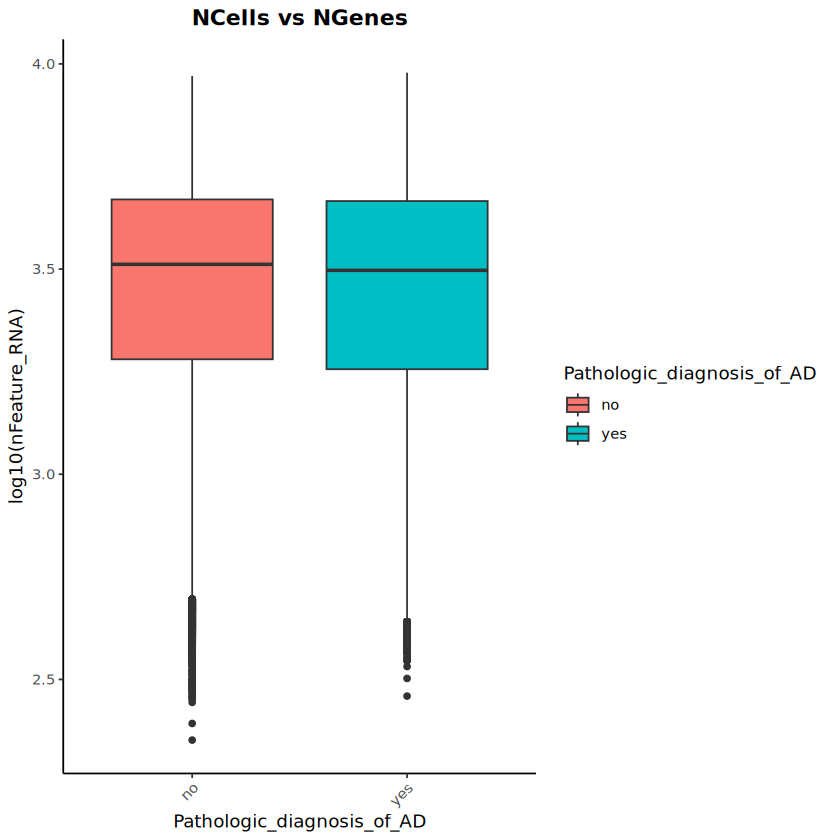

In [38]:
# Visualize the distribution of genes detected per cell via boxplot
metadata %>% 
  	ggplot(aes(x=Pathologic_diagnosis_of_AD, y=log10(nFeature_RNA), fill=Pathologic_diagnosis_of_AD)) + 
  	geom_boxplot() + 
  	theme_classic() +
  	theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1)) +
  	theme(plot.title = element_text(hjust=0.5, face="bold")) +
  	ggtitle("NCells vs NGenes")

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“The following aesthetics were dropped during statistical transformation: colour.
ℹ This can happen when ggplot fails to infer the correct grouping structure in the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical variable into a factor?”
Warning message:
“The following aesthetics were dropped during statistical transformation: colour.
ℹ This can happen when ggplot fails to infer the correct grouping structure in the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical variable into a factor?”


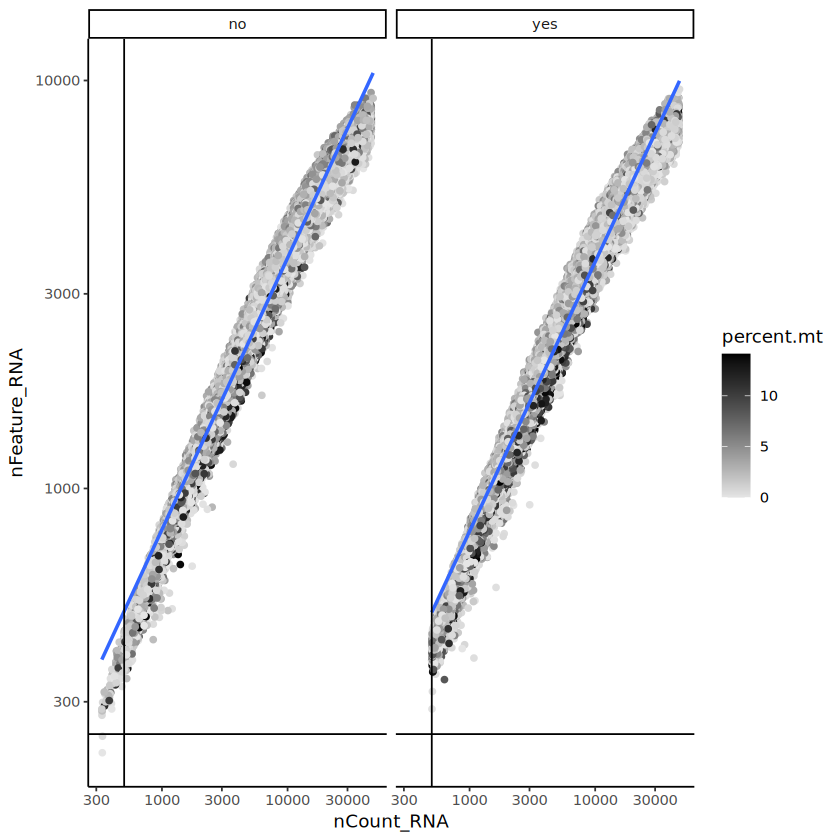

In [39]:
metadata %>% 
  	ggplot(aes(x=nCount_RNA, y=nFeature_RNA, color=percent.mt)) + 
  	geom_point() + 
	scale_colour_gradient(low = "gray90", high = "black") +
  	stat_smooth(method=lm) +
  	scale_x_log10() + 
  	scale_y_log10() + 
  	theme_classic() +
  	geom_vline(xintercept = 500) +
  	geom_hline(yintercept = 250) +
  	facet_wrap(~Pathologic_diagnosis_of_AD)

In [40]:
library(Seurat)
library(tidyverse)
library(RCurl)
library(cowplot)


Attaching package: ‘RCurl’


The following object is masked from ‘package:tidyr’:

    complete



Attaching package: ‘cowplot’


The following object is masked from ‘package:lubridate’:

    stamp


The following object is masked from ‘package:patchwork’:

    align_plots




In [41]:
View(inhibitory_seurat_obj)

An object of class Seurat 
33538 features across 329699 samples within 1 assay 
Active assay: RNA (33538 features, 0 variable features)
 1 layer present: counts

In [42]:
mat <- GetAssayData(object = inhibitory_seurat_obj)
#write.csv(mat, "../../preprocessed_data/inhibitory_neuron/inhibitory_neurons_mat.csv")

Warning message in GetAssayData.StdAssay(object = object[[assay]], layer = layer):
“data layer is not found and counts layer is used”


In [46]:
total_rows <- nrow(mat)
total_rows

[1] 33538

In [47]:
split_and_save_matrix <- function(mat, chunk_size, output_dir) {
  # Ensure the output directory exists
  if (!dir.exists(output_dir)) {
    dir.create(output_dir, recursive = TRUE)
  }

  # Get the total number of rows in the matrix
  total_rows <- nrow(mat)
  
  # Calculate the number of chunks needed
  num_chunks <- ceiling(total_rows / chunk_size)
  
  for (i in 1:num_chunks) {
    # Calculate the start and end row indices for this chunk
    start_row <- (i - 1) * chunk_size + 1
    end_row <- min(i * chunk_size, total_rows)
    
    # Extract the chunk
    chunk <- mat[start_row:end_row, ]
    
    # Define the output file name
    output_file <- file.path(output_dir, paste0("inhibitory_neurons_mat_chunk_", i, ".csv"))
    
    # Save the chunk to a CSV file
    write.csv(chunk, file = output_file)
    
    print(paste("Saved chunk", i, "to", output_file))
  }
}

# Example usage
chunk_size <- 2000  # Define the number of rows per chunk
output_dir <- "../../preprocessed_data/inhibitory_neuron/split_chunks"
split_and_save_matrix(mat, chunk_size, output_dir)


Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 4.9 GiB”


[1] "Saved chunk 1 to ../../preprocessed_data/inhibitory_neuron/split_chunks/inhibitory_neurons_mat_chunk_1.csv"


Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 4.9 GiB”


[1] "Saved chunk 2 to ../../preprocessed_data/inhibitory_neuron/split_chunks/inhibitory_neurons_mat_chunk_2.csv"


Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 4.9 GiB”


[1] "Saved chunk 3 to ../../preprocessed_data/inhibitory_neuron/split_chunks/inhibitory_neurons_mat_chunk_3.csv"


Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 4.9 GiB”


[1] "Saved chunk 4 to ../../preprocessed_data/inhibitory_neuron/split_chunks/inhibitory_neurons_mat_chunk_4.csv"


Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 4.9 GiB”


[1] "Saved chunk 5 to ../../preprocessed_data/inhibitory_neuron/split_chunks/inhibitory_neurons_mat_chunk_5.csv"


Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 4.9 GiB”


[1] "Saved chunk 6 to ../../preprocessed_data/inhibitory_neuron/split_chunks/inhibitory_neurons_mat_chunk_6.csv"


Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 4.9 GiB”


[1] "Saved chunk 7 to ../../preprocessed_data/inhibitory_neuron/split_chunks/inhibitory_neurons_mat_chunk_7.csv"


Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 4.9 GiB”


[1] "Saved chunk 8 to ../../preprocessed_data/inhibitory_neuron/split_chunks/inhibitory_neurons_mat_chunk_8.csv"


Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 4.9 GiB”


[1] "Saved chunk 9 to ../../preprocessed_data/inhibitory_neuron/split_chunks/inhibitory_neurons_mat_chunk_9.csv"


Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 4.9 GiB”


[1] "Saved chunk 10 to ../../preprocessed_data/inhibitory_neuron/split_chunks/inhibitory_neurons_mat_chunk_10.csv"


Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 4.9 GiB”


[1] "Saved chunk 11 to ../../preprocessed_data/inhibitory_neuron/split_chunks/inhibitory_neurons_mat_chunk_11.csv"


Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 4.9 GiB”


[1] "Saved chunk 12 to ../../preprocessed_data/inhibitory_neuron/split_chunks/inhibitory_neurons_mat_chunk_12.csv"


Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 4.9 GiB”


[1] "Saved chunk 13 to ../../preprocessed_data/inhibitory_neuron/split_chunks/inhibitory_neurons_mat_chunk_13.csv"


Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 4.9 GiB”


[1] "Saved chunk 14 to ../../preprocessed_data/inhibitory_neuron/split_chunks/inhibitory_neurons_mat_chunk_14.csv"


Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 4.9 GiB”


[1] "Saved chunk 15 to ../../preprocessed_data/inhibitory_neuron/split_chunks/inhibitory_neurons_mat_chunk_15.csv"


Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 4.9 GiB”


[1] "Saved chunk 16 to ../../preprocessed_data/inhibitory_neuron/split_chunks/inhibitory_neurons_mat_chunk_16.csv"


Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 3.8 GiB”


[1] "Saved chunk 17 to ../../preprocessed_data/inhibitory_neuron/split_chunks/inhibitory_neurons_mat_chunk_17.csv"


In [65]:
head(mat,10)

  [[ suppressing 33 column names ‘AACTTTCAGGATGGTC-1-0’, ‘ACGGGCTCAATCAGAA-1-0’, ‘AGCGGTCAGATGTTAG-1-0’ ... ]]



10 x 73061 sparse Matrix of class "dgCMatrix"
                                                                             
MIR1302-2HG . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
FAM138A     . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
OR4F5       . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
AL627309.1  . 1 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
AL627309.3  . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
AL627309.2  . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
AL627309.4  . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
AL732372.1  . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
OR4F29      . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
AC114498.1  . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
                  
MIR1302-2HG ......
FAM138A     ......
OR4F5       ......
AL627309.1  ......
A

In [66]:
count_matrix <- mat

In [67]:
last_column_name <- colnames(mat)[ncol(mat)]
print(last_column_name)

[1] "TTTACCAGTCAACACT-16-14"


In [70]:
last_column_sum <- sum(count_matrix[, ncol(count_matrix)])
print(last_column_sum)

[1] 2698


In [71]:
last_row_sum <- sum(count_matrix[nrow(count_matrix)-2, ])
print(last_row_sum)

[1] 2253


In [72]:
last_row_name <- rownames(count_matrix)[nrow(count_matrix)-2]
print(last_row_name)

[1] "AC240274.1"


# Normalization and dimensionality reduction

In [ ]:
seurat_phase <- NormalizeData(microglia_seurat_obj)

Normalizing layer: counts



In [ ]:
seurat_phase 

In [ ]:
srat <- FindVariableFeatures(seurat_phase, selection.method = "vst", nfeatures = 2000)